In [8]:
%matplotlib inline

In [25]:
import numpy as np
import pylab as pl
import scipy.fftpack

In [13]:
def make_fake_phase_data(nu,parms):
    
    """
    Function to create fake phase data for a 
    single time step, i.e. only frequency
    dependent
    
    Inputs:
    nu - array of frequency values [MHz]
    parms - array of parameters (phi0, bigT, bigK)
    
    Outputs:
    phi - array of phase values
    """
    
    phi0, bigT, bigK = parms[:]
    
    phi = phi0 + 2*np.pi*(nu*1e6)*bigT + 2*np.pi*bigK/(nu*1e6)
    
    return phi

In [20]:
phi0 = 0.
bigT = 5e-6
bigK = 5e6

nu_min = 50.   # MHz
nu_max = 200.  # MHz
delta_nu = 10. # MHz

parms=np.array([phi0,bigT,bigK])
nu = np.arange(nu_min,nu_max,delta_nu)

phi = make_fake_phase_data(nu,parms)

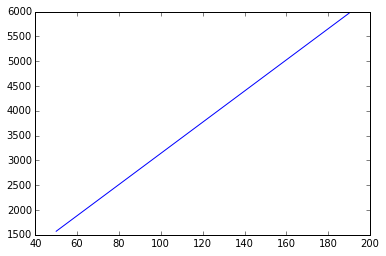

In [21]:
pl.subplot(111)
pl.plot(nu,phi)
pl.show()

In [23]:
y = np.exp(1j*phi)

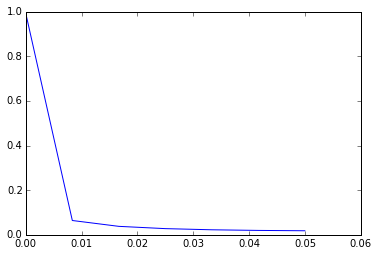

In [27]:
T = delta_nu
N = len(nu)

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = pl.subplots()
ax.plot(xf, 1.0/N * np.abs(yf[0:N/2]))
pl.show()

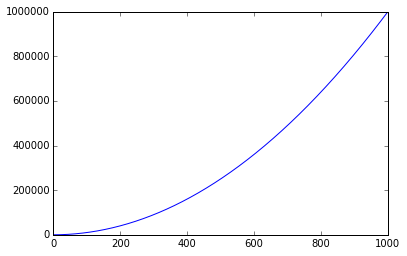

In [28]:
a0 = 1.;a1 = 1.;a2 = 1.
x = np.arange(0,1000,1)
y = a0+a1*x+a2*x**2

pl.subplot(111)
pl.plot(x,y)
pl.show()

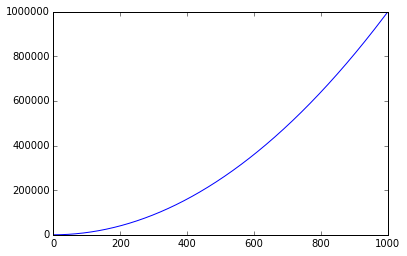

In [29]:
y+=np.random.normal(size=len(y))

pl.subplot(111)
pl.plot(x,y)
pl.show()

In [39]:
import scipy.linalg as sp

xm = np.zeros((len(x),3))
for val in x:
    xm[val,:] = np.array([1.,val,val**2])
    
print xm

norm = np.dot(xm.T,xm)
betahat = np.dot(sp.inv(norm),np.dot(xm.T,y))
print betahat

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   2.00000000e+00   4.00000000e+00]
 ..., 
 [  1.00000000e+00   9.97000000e+02   9.94009000e+05]
 [  1.00000000e+00   9.98000000e+02   9.96004000e+05]
 [  1.00000000e+00   9.99000000e+02   9.98001000e+05]]
[ 1.03346494  0.99961428  1.00000028]
